In [54]:
import pandas as pd
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
import time
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support import expected_conditions as EC
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
sns.set(style='whitegrid',palette='husl')
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

[nltk_data] Downloading package punkt to /Users/lilyliu-
[nltk_data]     krason/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/lilyliu-
[nltk_data]     krason/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# !pip install nltk

In [29]:
df=pd.read_csv('merged_final_07172019.csv',thousands=',')

In [30]:
df=df.drop(columns=['raised','goal'])

In [31]:
df.head(3)

,Unnamed: 0,link,location,summary,title,created_date,tag,state,goal_int,raised_int
0,0,https://www.gofundme.com/steven-crowder-live-a...,"Dallas, TX",SMU College Republicans is bringing comedian S...,Steven Crowder Live at SMU!,"Created March 7, 2018",rep,TX,6500.0,2710.0
1,1,https://www.gofundme.com/reopen-a-nc-republica...,"Brookline, MA",NOTE: We reached our goal and then some in les...,Dems help reopen a NC Repub office,"Created October 16, 2016",rep,MA,10000.0,12857.0
2,2,https://www.gofundme.com/troopersanchez,"Mcallen, TX","￼ Moises Sanchez, a Texas State Trooper, was s...",Funds for Trooper Moises Sanchez,"Created April 7, 2019",rep,TX,20000.0,13021.0


In [32]:
df.tag.value_counts()

rep    864
dem    850
Name: tag, dtype: int64

In [33]:
#converting dates
df['created_date']=df.created_date.str.replace('Created ','')

# df['date']=pd.to_datetime(df.created_date,infer_datetime_format=True)

In [34]:
#you'll have to drop the 1 day ago, 3 days ago...where the F did this come from?
ago_df=df[df.created_date.str.contains('ago')==True]
ago_df['created_date']=ago_df.created_date.str.replace(' ago','')

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
ago_df.created_date[ago_df.created_date=='1 day'].

467     1 day
748     1 day
1583    1 day
Name: created_date, dtype: object

In [41]:
# turn hours to day
ago_df.loc[ago_df.created_date.str.contains("hour"), 'created_date']='1 day'

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
# extract the date difference
ago_df['data_diff'] = ago_df.created_date.str.extract(r'(\d+)', expand=False).astype(int)

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
ago_df['created_actual']=ago_df['data_diff'].apply(lambda x: pd.datetime.now().date()-timedelta(days=x))

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,link,location,summary,title,created_date,tag,state,goal_int,raised_int,data_diff
467,531,https://www.gofundme.com/defeat-the-hijackers-...,"Grand Blanc, MI",For the last seven years I have been the subje...,"Hijacking America: The Book, ExplCmte Joe4Prez",1 day,rep,MI,5000.0,51.0,1
670,765,https://www.gofundme.com/1planet-climate-champ...,"Alexandria, VA",The Republican Majority in the Virginia Genera...,1Planet Climate Champions Fund,6 days,rep,VA,3000.0,100.0,6
744,848,https://www.gofundme.com/AMassiveParadigmShift,"Boston, MA",The September 11th Attacks... put America on a...,HELP SAVE THE AMERICAN DREAM!,1 day,rep,MA,50000000.0,0.0,1


In [8]:
# df = df.set_index('date')

In [9]:
#creating Year, Month, Weekday Name
df['Year'] = df.date.dt.year
df['Month'] = df.date.dt.month
df['Weekday Name'] = df.date.dt.weekday_name

In [10]:
df.head(3)

,Unnamed: 0,link,location,summary,title,tag,created_date,goal_int,raised_int,date,Year,Month,Weekday Name
0,0,https://www.gofundme.com/steven-crowder-live-a...,"Dallas, TX",SMU College Republicans is bringing comedian S...,Steven Crowder Live at SMU!,rep,"March 7, 2018",6500.0,2710.0,2018-03-07,2018,3,Wednesday
1,1,https://www.gofundme.com/reopen-a-nc-republica...,"Brookline, MA",NOTE: We reached our goal and then some in les...,Dems help reopen a NC Repub office,rep,"October 16, 2016",10000.0,12857.0,2016-10-16,2016,10,Sunday
2,3,https://www.gofundme.com/mugop,"Columbia, MO",We are the University of Missouri - College Re...,Mizzou College Republicans,rep,"November 17, 2015",5000.0,3649.0,2015-11-17,2015,11,Tuesday


In [11]:
#adding state in hoping for some pretty colors


# Using Crosstab to Compare "Democrat" vs "Republican"

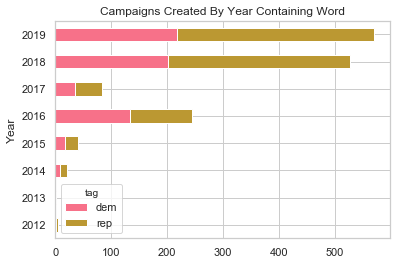

In [244]:
pd.crosstab(index=df.Year,columns=df.tag).plot(kind='barh',stacked=True,title='Campaigns Created By Year Containing Word')

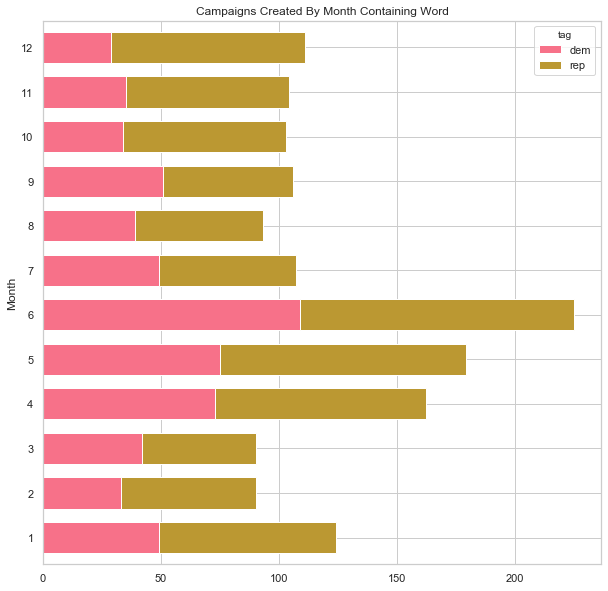

In [245]:
pd.crosstab(index=df.Month,columns=df.tag).plot(kind='barh',stacked=True,width=0.7,title='Campaigns Created By Month Containing Word',figsize=(10,10))

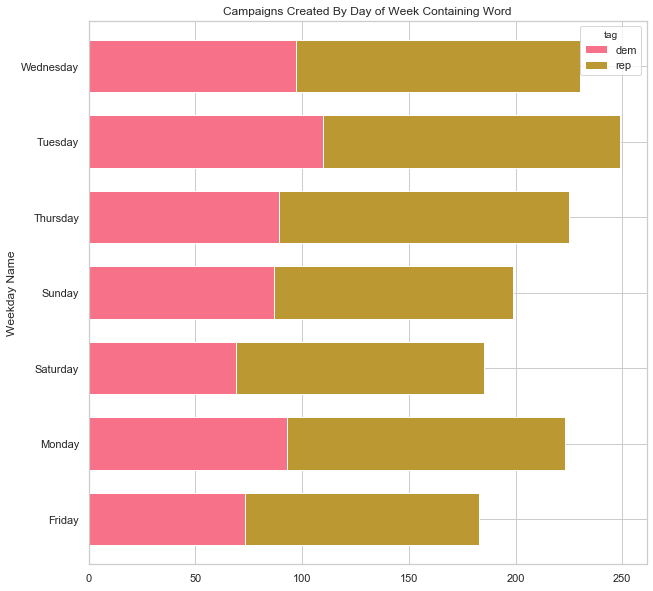

In [246]:
pd.crosstab(index=df['Weekday Name'],columns=df.tag).plot(kind='barh',stacked=True,width=0.7,title='Campaigns Created By Day of Week Containing Word',figsize=(10,10))

In [247]:
df.groupby('tag')['goal_int'].sum()

tag
dem    5.063720e+09
rep    1.649724e+10
Name: goal_int, dtype: float64

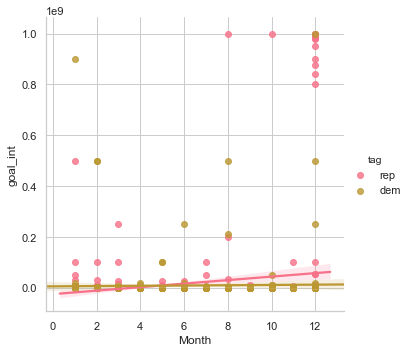

In [248]:
sns.lmplot(x='Month',y='goal_int',hue='tag',data=df)

# Aggregate Graphs


In [249]:
# #using seaborn time series formatting
# sns.set(rc={'figure.figsize':(11, 4)})

In [250]:
df['Weekday Name'] = pd.Categorical(df['Weekday Name'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

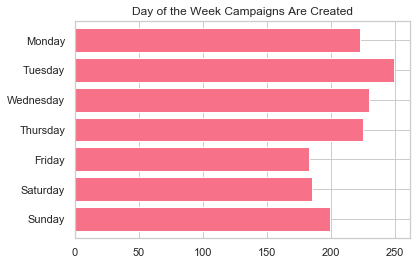

In [251]:
created_by_day = df['Weekday Name'].value_counts()
created_by_day = created_by_day.sort_index(ascending=False)
created_by_day.plot(kind='barh',width=0.8,title= "Day of the Week Campaigns Are Created")
plt.savefig("agg_day_of_week.pdf")

In [252]:
rep_year=df[df['tag']=='rep'].Year.value_counts().rename_axis('Year').reset_index(name='rep_counts')
dem_year =df[df['tag']=='dem'].Year.value_counts().rename_axis('Year').reset_index(name='dem_counts')

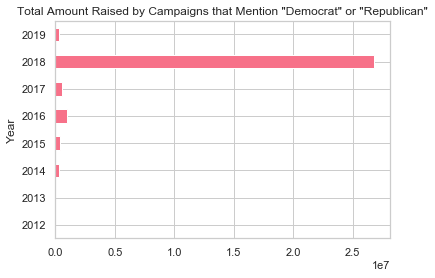

In [253]:
#total amount raised
#what is this scale though? How do I change this?
df.groupby('Year')['raised_int'].sum().plot(kind='barh',title='Total Amount Raised by Campaigns that Mention "Democrat" or "Republican"')

# plt.savefig("total_amount_raised.pdf")

In [254]:
data=pd.DataFrame(df.groupby('Year')['tag'].value_counts())

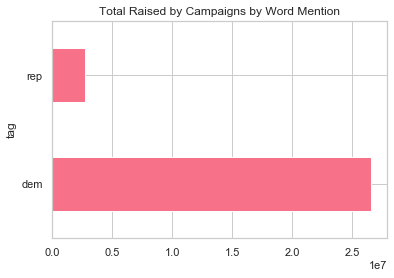

In [255]:
df.groupby('tag')['raised_int'].sum().plot(kind='barh',title='Total Raised by Campaigns by Word Mention')

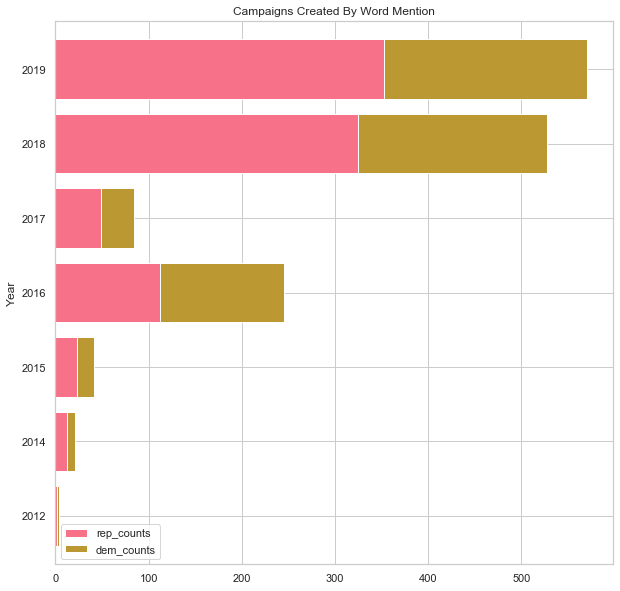

In [256]:
#another way not as good as crosstab
year_df=rep_year.merge(dem_year, left_on='Year',right_on='Year')
year_df.sort_values('Year').set_index('Year').plot(kind='barh',stacked=True,width=0.8,title='Campaigns Created By Word Mention',figsize=(10,10))
# plt.savefig("campaigns_stacked.pdf")


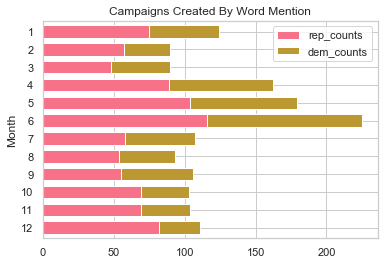

In [257]:
# #some other BS I did
rep_Month=df[df['tag']=='rep'].Month.value_counts().rename_axis('Month').reset_index(name='rep_counts')
dem_Month =df[df['tag']=='dem'].Month.value_counts().rename_axis('Month').reset_index(name='dem_counts')
Month_df=rep_Month.merge(dem_Month, left_on='Month',right_on='Month')
Month_df.sort_values('Month').set_index('Month').sort_values(by='Month',ascending=False).plot(kind='barh',stacked=True,width=0.7,title='Campaigns Created By Word Mention')
plt.savefig("campaigns_stacked2.1.pdf")

In [258]:
df.sample(5, random_state=0)

,Unnamed: 0,link,location,summary,title,tag,created_date,goal_int,raised_int,date,Year,Month,Weekday Name
799,903,https://www.gofundme.com/establish-hitchens-cu...,"Greensboro, NC",“We have deeply held beliefs in rational think...,Hitchens Cultural Center,rep,"June 1, 2019",10000.0,0.0,2019-06-01,2019,6,Saturday
1047,249,https://www.gofundme.com/greenforbernie16,"Marrero, LA","Hello, I'm Kyle Green. In May, I was elected b...",Louisiana Delegate for Bernie Fund,dem,"June 22, 2016",3300.0,3352.0,2016-06-22,2016,6,Wednesday
1436,878,https://www.gofundme.com/recall-mayor-of-los-a...,"Canyon Country, CA",Eric Garcetti has failed to protect the people...,Recall Mayor of Los Angeles Eric Garcetti,dem,"June 11, 2019",1000000.0,0.0,2019-06-11,2019,6,Tuesday
54,61,https://www.gofundme.com/1oi4td52o0,"Dallas, TX",My goal is to train our youth in the art of gu...,Gun Training For Young Republicans,rep,"June 27, 2019",10000.0,0.0,2019-06-27,2019,6,Thursday
793,894,https://www.gofundme.com/xbhak-trump-loves-imm...,"Grand Rapids, MI",MISSION: TO EMPOWER THE REPUBLICAN IMMIGRANTS ...,TRUMP LOVES IMMIGRANTS,rep,"June 6, 2019",1000.0,0.0,2019-06-06,2019,6,Thursday


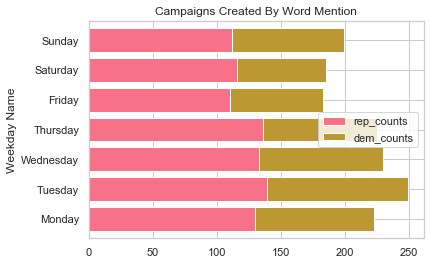

In [259]:
rep_Weekday_Name=df[df['tag']=='rep']['Weekday Name'].value_counts().rename_axis('Weekday Name').reset_index(name='rep_counts')
dem_Weekday_Name =df[df['tag']=='dem']['Weekday Name'].value_counts().rename_axis('Weekday Name').reset_index(name='dem_counts')
Weekday_Name_df=rep_Weekday_Name.merge(dem_Weekday_Name, left_on='Weekday Name',right_on='Weekday Name')
Weekday_Name_df.sort_values('Weekday Name').set_index('Weekday Name').plot(kind='barh',stacked=True,width=0.8,title='Campaigns Created By Word Mention')

plt.savefig("output.pdf")

In [260]:
df.groupby('tag')['Weekday Name'].value_counts()

tag  Weekday Name
dem  Tuesday         110
     Wednesday        97
     Monday           93
     Thursday         89
     Sunday           87
     Friday           73
     Saturday         69
rep  Tuesday         139
     Thursday        136
     Wednesday       133
     Monday          130
     Saturday        116
     Sunday          112
     Friday          110
Name: Weekday Name, dtype: int64

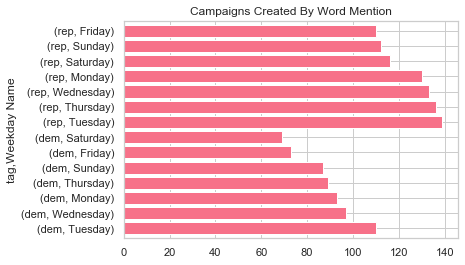

In [261]:
#playing with groupbys 
df.groupby('tag')['Weekday Name'].value_counts().plot(kind='barh',stacked=True,width=0.8,title='Campaigns Created By Word Mention')

In [10]:
df.sample(3, random_state=0)

,Unnamed: 0,link,location,summary,title,tag,created_date,goal_int,raised_int,date,Year,Month,Weekday Name
799,903,https://www.gofundme.com/establish-hitchens-cu...,"Greensboro, NC",“We have deeply held beliefs in rational think...,Hitchens Cultural Center,rep,"June 1, 2019",10000.0,0.0,2019-06-01,2019,6,Saturday
1047,249,https://www.gofundme.com/greenforbernie16,"Marrero, LA","Hello, I'm Kyle Green. In May, I was elected b...",Louisiana Delegate for Bernie Fund,dem,"June 22, 2016",3300.0,3352.0,2016-06-22,2016,6,Wednesday
1436,878,https://www.gofundme.com/recall-mayor-of-los-a...,"Canyon Country, CA",Eric Garcetti has failed to protect the people...,Recall Mayor of Los Angeles Eric Garcetti,dem,"June 11, 2019",1000000.0,0.0,2019-06-11,2019,6,Tuesday


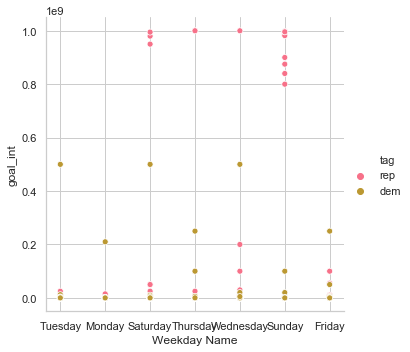

In [263]:
#the graveyard
data = df[df['raised_int']==0]
sns.relplot(data=data, x='Weekday Name', y='goal_int', hue='tag')

# Common Words!

In [11]:
#campaigns with the word republican
top_N = 100000
rep_rslt =pd.DataFrame()
for index, row in df[df['tag']=='rep'].iterrows():
    txt = row['summary'].lower()
    words = nltk.tokenize.word_tokenize(txt)
    word_dist = nltk.FreqDist(words)
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    print('All frequencies, including STOPWORDS:')
    print('=' * 60)
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency'])
    print(rslt)
    print('=' * 60)
    rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),columns=['Word', 'Frequency']).set_index('Word')
    rep_rslt=rep_rslt.append(rslt)

All frequencies, including STOPWORDS:
             Word  Frequency
0             smu          4
1              to          4
2               ,          3
3         crowder          2
4              on          2
5              at          2
6        mcfarlin          2
7               .          2
8             the          2
9         college          1
10    republicans          1
11             is          1
12       bringing          1
13       comedian          1
14         steven          1
15       thursday          1
16          march          1
17             22          1
18            7pm          1
19             in          1
20     auditorium          1
21            due          1
22             an          1
23      extremely          1
24           high          1
25         demand          1
26            see          1
27         louder          1
28           with          1
29           live          1
30             we          1
31            are          1
32   

       Word  Frequency
0   summary          1
1       was          1
2  nonetype          1
All frequencies, including STOPWORDS:
            Word  Frequency
0            the          4
1             to          3
2         campus          2
3            and          2
4           keep          2
5          texas          2
6            red          2
7             of          2
8              ,          2
9             we          2
10          help          1
11       college          1
12   republicans          1
13         serve          1
14            ut          1
15        austin          1
16           for          1
17       decades          1
18          come          1
19             !          1
20          next          1
21    generation          1
22         texan          1
23        voters          1
24       leaders          1
25            is          1
26       walking          1
27        around          1
28           our          1
29         right          1
30

All frequencies, including STOPWORDS:
            Word  Frequency
0             to          4
1      president          4
2              .          4
3              i          3
4             am          3
5            the          2
6     republican          2
7            not          2
8              a          2
9          trump          2
10             ,          2
11     qualified          2
12            be          2
13         maybe          2
14         party          1
15           has          1
16     presented          1
17       nominee          1
18     challenge          1
19            in          1
20     primaries          1
21         until          1
22          that          1
23       happens          1
24       raising          1
25         funds          1
26         start          1
27  presidential          1
28      campaign          1
29             ?          1
30     currently          1
31          more          1
32          than          1
33        

All frequencies, including STOPWORDS:
             Word  Frequency
0              he          5
1               .          4
2              in          3
3            name          2
4               a          2
5          played          2
6        baseball          2
7             the          2
8              as          2
9          travel          2
10           team          2
11             my          1
12            son          1
13             is          1
14           jose          1
15       delacruz          1
16           from          1
17          small          1
18           town          1
19         dinuba          1
20            has          1
21          since          1
22            was          1
23           five          1
24          years          1
25            old          1
26            for          1
27      community          1
28           well          1
29            not          1
30           only          1
31          gives          1
32   

           Word  Frequency
0             .          3
1            my          3
2             i          2
3           not          2
4          hide          2
5           any          2
6            us          2
7         black          2
8           out          2
9            of          2
10           me          2
11          and          2
12           he          2
13         will          1
14       longer          1
15          the          1
16         left          1
17          has          1
18         made          1
19         feel          1
20           as          1
21           if          1
22  republicans          1
23       should          1
24         more          1
25            !          1
26           'm          1
27          now          1
28      getting          1
29       kicked          1
30         home          1
31       mother          1
32    literally          1
33         woke          1
34           up          1
35        sleep          1
3

           Word  Frequency
0           the          6
1      students          3
2        school          2
3            17          2
4            to          2
5         after          1
6      massacre          1
7            at          1
8       marjory          1
9      stoneman          1
10      douglas          1
11         high          1
12           in          1
13     parkland          1
14      florida          1
15         that          1
16        kills          1
17          and          1
18      injured          1
19        other          1
20            ,          1
21       united          1
22       states          1
23   republican          1
24   leadership          1
25    committee          1
26           is          1
27       stands          1
28           up          1
29         help          1
30       boards          1
31       around          1
32      country          1
33      provide          1
34            a          1
35        safer          1
3

All frequencies, including STOPWORDS:
           Word  Frequency
0          this          3
1        people          3
2             .          3
3            's          2
4           are          2
5           and          2
6         about          2
7            we          2
8         money          2
9            to          2
10          the          2
11    obviously          1
12       should          1
13       happen          1
14         real          1
15        lives          1
16           at          1
17        stake          1
18           it          1
19         time          1
20      started          1
21       taking          1
22       action          1
23            i          1
24           'm          1
25      raising          1
26       travel          1
27      explain          1
28          why          1
29         need          1
30         wall          1
31          all          1
32       across          1
33      country          1
34      missing  

All frequencies, including STOPWORDS:
            Word  Frequency
0              i          3
1            the          3
2            you          2
3             in          2
4             ''          2
5             to          2
6             me          2
7             my          2
8              .          2
9           know          1
10            it          1
11            is          1
12           bad          1
13      virginia          1
14         beach          1
15             ,          1
16            va          1
17          when          1
18           say          1
19            am          1
20        having          1
21       trouble          1
22          they          1
23           are          1
24        trying          1
25          make          1
26             a          1
27          whre          1
28           and          1
29           guy          1
30          have          1
31  concersation          1
32          with          1
33        

        Word  Frequency
0          .          7
1        for          3
2       wall          3
3          a          3
4        the          2
5         we          2
6       have          2
7        our          2
8    country          2
9          ,          2
10        if          2
11     could          2
12    donate          2
13      more          2
14     tired          1
15        of          1
16   hearing          1
17     about          1
18   funding          1
19        to          1
20    safety          1
21   another          1
22     young          1
23     woman          1
24    killed          1
25        by          1
26        un          1
27   illegal          1
28     alien          1
29      it's          1
30       let          1
31        's          1
32       pay          1
33  everyone          1
34      even          1
35      just          1
36         $          1
37        10          1
38       you          1
39        do          1
40      note    

All frequencies, including STOPWORDS:
            Word  Frequency
0              i          4
1           that          3
2             my          3
3              .          3
4             to          3
5              ,          3
6              ’          2
7              a          2
8       research          2
9             is          2
10           the          2
11            hi          1
12         folks          1
13            ❤️          1
14      recently          1
15         found          1
16           out          1
17          wasn          1
18             t          1
19       awarded          1
20         grant          1
21          from          1
22    department          1
23          what          1
24         means          1
25          have          1
26          find          1
27           way          1
28       somehow          1
29      complete          1
30  dissertation          1
31      archival          1
32            on          1
33        

All frequencies, including STOPWORDS:
            Word  Frequency
0            our          6
1       hospital          3
2             to          3
3        billion          2
4         dollar          2
5             in          2
6           july          1
7            1st          1
8             of          1
9           2014          1
10          town          1
11          lost          1
12           due          1
13         fraud          1
14             .          1
15     community          1
16          gave          1
17             a          1
18    healthcare          1
19  conglomerate          1
20           who          1
21      promised          1
22      maintian          1
23           and          1
24    strengthen          1
25         2011.          1
26          2013          1
27           the          1
28           non          1
29        profit          1
30     announced          1
31          they          1
32          were          1
33       c

          Word  Frequency
0            ,          8
1          and          3
2        james          2
3        vance          2
4            -          2
5         june          2
6         kate          2
7       worley          2
8          two          2
9        april          1
10           2          1
11        1953          1
12           5          1
13        2017          1
14       march          1
15          16          1
16        1958          1
17           6          1
18        2004          1
19          of          1
20      comics          1
21        most          1
22     notable          1
23     authors          1
24         had          1
25    children          1
26    together          1
27       jacob          1
28       sarah          1
29           .          1
30        they          1
31        both          1
32        have          1
33        been          1
34   diagnosed          1
35          on          1
36         the          1
37      auti

              Word  Frequency
0               to          5
1               we          3
2                !          3
3         february          2
4               of          2
5               in          2
6              the          2
7              our          1
8         campaign          1
9                :          1
10             are          1
11           going          1
12      washington          1
13            d.c.          1
14       21st-23rd          1
15             and          1
16            will          1
17           bring          1
18             535          1
19          copies          1
20              ``          1
21        profiles          1
22         courage          1
23              ''          1
24            hand          1
25             out          1
26           every          1
27          member          1
28        congress          1
29               .          1
30            need          1
31           funds          1
32        

All frequencies, including STOPWORDS:
         Word  Frequency
0           i          5
1           ,          4
2          is          2
3           .          2
4    inspired          2
5       years          2
6         the          2
7         and          2
8       thank          1
9         you          1
10       very          1
11       much          1
12         my          1
13       name          1
14      sarah          1
15    parrish          1
16         'm          1
17       from          1
18    merriam          1
19         in          1
20    johnson          1
21     county          1
22     kansas          1
23       have          1
24       been          1
25         by          1
26     bernie          1
27    sanders          1
28        for          1
29       many          1
30      since          1
31      first          1
32       time          1
33        saw          1
34        him          1
35         on          1
36      daily          1
37       sho

          Word  Frequency
0            a          4
1           is          4
2           of          3
3          and          3
4          she          3
5          for          2
6           to          2
7       become          2
8         u.s.          2
9      citizen          2
10           .          2
11         has          2
12           i          1
13           ’          1
14           m          1
15     raising          1
16           $          1
17         700          1
18        very          1
19       close          1
20      friend          1
21        mine          1
22         who          1
23        from          1
24    trinidad          1
25      trying          1
26     already          1
27        been          1
28      living          1
29        here          1
30         20+          1
31       years          1
32           ,          1
33    recently          1
34    inspired          1
35         our          1
36     country          1
37        th

All frequencies, including STOPWORDS:
                 Word  Frequency
0                   ,          3
1                cruz          3
2              joshua          2
3                  of          2
4                 ted          2
5                  at          2
6                 and          2
7                 the          2
8                 his          2
9                  to          2
10                our          1
11               dear          1
12             friend          1
13              rojas          1
14            founder          1
15               2016          1
16           facebook          1
17              group          1
18              state          1
19           director          1
20              texas          1
21        millennials          1
22                for          1
23  founder/president          1
24            college          1
25        republicans          1
26              utrgv          1
27           edinburg          1
28   

All frequencies, including STOPWORDS:
         Word  Frequency
0         the          4
1          to          3
2           i          2
3         our          2
4           .          2
5     summary          1
6       story          1
7           :          1
8     believe          1
9    upcoming          1
10   mid-term          1
11  elections          1
12        are          1
13       most          1
14  important          1
15         in          1
16         my          1
17   lifetime          1
18         am          1
19     deeply          1
20  concerned          1
21       that          1
22         we          1
23       have          1
24      never          1
25       been          1
26     closer          1
27     losing          1
28  democracy          1
29          ,          1
30     except          1
31    perhaps          1
32     during          1
33      civil          1
34        war          1
35       your          1
36   donation          1
37       wil

All frequencies, including STOPWORDS:
             Word  Frequency
0             the          6
1              of          4
2     documentary          2
3            will          2
4       following          2
5              my          2
6             and          2
7            this          1
8          follow          1
9   chronological          1
10        account          1
11        streets          1
12      charlotte          1
13          death          1
14          keith          1
15         lamont          1
16          scott          1
17    culminating          1
18           with          1
19         arrest          1
20        outside          1
21            boa          1
22        stadium          1
23             on          1
24         sunday          1
25      september          1
26             25          1
27        address          1
28             to          1
29          mayor          1
30           city          1
31        council          1
32   

                Word  Frequency
0                 of          3
1                 in          2
2            georgia          2
3                his          2
4                 to          2
5                  ￼          1
6                ￼on          1
7           election          1
8              night          1
9               2018          1
10                 ,          1
11                we          1
12               all          1
13           watched          1
14            horror          1
15                as          1
16       republicans          1
17             stole          1
18         statewide          1
19         elections          1
20               and          1
21           florida          1
22                 .          1
23        republican          1
24         secretary          1
25             state          1
26             brian          1
27              kemp          1
28              used          1
29          official          1
30      

           Word  Frequency
0       support          3
1             .          3
2             i          3
3            to          3
4           the          2
5           and          2
6       america          2
7             ’          2
8             s          2
9            as          1
10            a          1
11       nation          1
12           we          1
13         must          1
14          our          1
15      natural          1
16         born          1
17     citizens          1
18        first          1
19         they          1
20          are          1
21        heart          1
22         soul          1
23           of          1
24        legal          1
25  immigration          1
26         tied          1
27      country          1
28     economic          1
29        needs          1
30      ability          1
31   assimilate          1
32    newcomers          1
33       strong          1
34      borders          1
35         also          1
3

All frequencies, including STOPWORDS:
            Word  Frequency
0            the          5
1              .          4
2              ,          3
3             to          3
4             is          2
5              i          2
6             an          2
7     convention          2
8             of          2
9          hello          1
10            my          1
11          name          1
12       micheal          1
13          baca          1
14           was          1
15      recently          1
16       elected          1
17            as          1
18     alternate          1
19    democratic          1
20      national          1
21            in          1
22  philadelphia          1
23  pennslyvania          1
24     represent          1
25        people          1
26      colorado          1
27            am          1
28       raising          1
29         money          1
30         cover          1
31      expenses          1
32          trip          1
33        

All frequencies, including STOPWORDS:
         Word  Frequency
0          my          3
1           a          3
2        year          3
3           .          3
4           !          2
5           i          2
6     college          2
7         has          2
8        been          2
9          to          2
10        the          2
11         hi          1
12       name          1
13         is          1
14   isabella          1
15         am          1
16         24          1
17        old          1
18    student          1
19   studying          1
20  cinematic          1
21        art          1
22         in          1
23       last          1
24         at          1
25       umbc          1
26    journey          1
27   struggle          1
28         it          1
29       took          1
30         me          1
31       much          1
32     longer          1
33       time          1
34        get          1
35    through          1
36       past          1
37    hardes

All frequencies, including STOPWORDS:
          Word  Frequency
0            ,          4
1           in          3
2            .          3
3           of          3
4            i          2
5         2016          1
6        there          1
7         were          1
8      323,450          1
9       sexual          1
10    assaults          1
11     america          1
12        when          1
13       brett          1
14   kavanaugh          1
15    released          1
16      images          1
17         his          1
18        1982          1
19    calendar          1
20         was          1
21      struck          1
22          by          1
23       their          1
24      visual          1
25       power          1
26         not          1
27     because          1
28       found          1
29        them          1
30  compelling          1
31          as          1
32    evidence          1
33   innocence          1
34           ;          1
35       quite          1


       Word  Frequency
0   summary          1
1       was          1
2  nonetype          1
All frequencies, including STOPWORDS:
            Word  Frequency
0              i          4
1            the          3
2              .          3
3            and          3
4            was          2
5             in          2
6          tired          2
7             of          2
8             to          2
9         people          2
10          last          1
11        spring          1
12       elected          1
13     committee          1
14        person          1
15          46th          1
16          ward          1
17  philadelphia          1
18           ran          1
19       because          1
20        status          1
21           quo          1
22      fighting          1
23           for          1
24      policies          1
25       protect          1
26        planet          1
27          only          1
28         watch          1
29     democrats          1
30

All frequencies, including STOPWORDS:
          Word  Frequency
0           to          3
1            ,          3
2           in          3
3            !          2
4            i          2
5      alfredo          2
6           is          2
7            a          2
8            .          2
9           of          2
10        hola          1
11      amigos          1
12       would          1
13        like          1
14         you          1
15        meet          1
16          my          1
17        best          1
18       buddy          1
19          he          1
20       three          1
21       years          1
22         old          1
23         and          1
24       lives          1
25    honduras          1
26  developing          1
27      nation          1
28     central          1
29     america          1
30     started          1
31        this          1
32    gofundme          1
33       raise          1
34       money          1
35         for          1


All frequencies, including STOPWORDS:
                Word  Frequency
0                  ,          5
1                 my          2
2                 is          2
3            rodland          2
4                  .          2
5                 's          2
6                the          2
7                 of          2
8              hello          1
9                  !          1
10              name          1
11               ole          1
12              this          1
13              fund          1
14                to          1
15           support          1
16              wife          1
17             nancy          1
18               gop          1
19          national          1
20        convention          1
21           elected          1
22          delegate          1
23  responsibilities          1
24               she          1
25               has          1
26      successfully          1
27        campaigned          1
28               for          1
29

All frequencies, including STOPWORDS:
           Word  Frequency
0           the          3
1             a          3
2           and          3
3          seat          2
4            it          2
5             .          2
6          that          2
7    democratic          2
8            an          2
9   independent          2
10         2018          1
11           is          1
12         year          1
13           we          1
14         take          1
15       senate          1
16         turn          1
17         into          1
18   productive          1
19        after          1
20       seeing          1
21         what          1
22         went          1
23           on          1
24       during          1
25         2016          1
26            ,          1
27       became          1
28      obvious          1
29         both          1
30   republican          1
31      parties          1
32          are          1
33         mess          1
34        being  

All frequencies, including STOPWORDS:
           Word  Frequency
0             a          4
1             ,          3
2            to          2
3           let          1
4            's          1
5           get          1
6          paid          1
7           the          1
8          time          1
9           has          1
10         come          1
11    introduce          1
12          new          1
13          way          1
14           of          1
15     thinking          1
16          and          1
17   conducting          1
18     business          1
19           in          1
20   shreveport          1
21           la          1
22            !          1
23    visionary          1
24         plan          1
25  emphasizing          1
26     cultural          1
27    diversity          1
28         must          1
29           be          1
30  implemented          1
31  immediately          1
32           if          1
33  progressive          1
34       minded  

            Word  Frequency
0              ,          4
1             on          2
2       december          2
3              i          2
4             to          2
5            the          2
6             in          2
7             of          2
8       saturday          1
9             27          1
10          plan          1
11         cycle          1
12           145          1
13         miles          1
14          from          1
15  independence          1
16          mall          1
17  philadelphia          1
18       capitol          1
19          hill          1
20    washington          1
21            dc          1
22      arriving          1
23            30          1
24          just          1
25        before          1
26   republicans          1
27    officially          1
28          take          1
29       control          1
30      congress          1
31             .          1
32          will          1
33            be          1
34       pulling    

          Word  Frequency
0          the          7
1            .          3
2        trump          2
3        unity          2
4       bridge          2
5      driving          2
6           to          2
7           in          2
8           be          2
9            $          2
10          is          1
11      across          1
12     country          1
13      spread          1
14        word          1
15          on          1
16  importance          1
17          of          1
18      voting          1
19  republican          1
20     midterm          1
21   elections          1
22          we          1
23           ’          1
24          ll          1
25        from          1
26    michigan          1
27         dfw          1
28       texas          1
29        then          1
30        onto          1
31        nola          1
32       there          1
33        will          1
34     various          1
35       stops          1
36       along          1
37         w

           Word  Frequency
0            to          3
1          that          3
2           had          2
3          paid          2
4           her          2
5             .          2
6            it          2
7             ,          2
8           the          2
9      multiple          1
10        times          1
11    questions          1
12         were          1
13       raised          1
14       asking          1
15          how          1
16           ms          1
17       blasey          1
18         ford          1
19          for          1
20    polygraph          1
21        legal          1
22      counsel          1
23          put          1
24       things          1
25         rest          1
26       saying          1
27         they          1
28      appears          1
29           as          1
30           of          1
31          now          1
32           we          1
33          are          1
34          not          1
35        going          1
3

                     Word  Frequency
0                   laura          3
1                 surgery          3
2                      of          2
3                     the          2
4                      on          2
5                  coffee          1
6                  county          1
7                   craft          1
8   association/foothills          1
9                  crafts          1
10                   vice          1
11              president          1
12                  board          1
13              directors          1
14                schultz          1
15                    had          1
16                 retina          1
17             attachment          1
18                      3          1
19                  weeks          1
20                    ago          1
21                      ,          1
22                     at          1
23                      a          1
24                 follow          1
25                     up          1
2

All frequencies, including STOPWORDS:
              Word  Frequency
0                i          4
1               to          3
2              the          3
3                .          3
4                ,          3
5              and          2
6         register          2
7               am          1
8          running          1
9        represent          1
10          people          1
11              of          1
12    pennsylvania          1
13          senate          1
14        district          1
15              37          1
16             all          1
17  pennsylvanians          1
18            http          1
19               :          1
20   //jvforpa.org          1
21              it          1
22              's          1
23          lonely          1
24              in          1
25          middle          1
26            when          1
27          turned          1
28              18          1
29             was          1
30         excited          1
31

All frequencies, including STOPWORDS:
           Word  Frequency
0           for          5
1             ,          4
2             i          4
3            am          3
4            to          2
5           you          2
6       council          2
7           and          2
8          your          2
9           the          2
10           on          2
11       served          2
12         dear          1
13       friend          1
14      writing          1
15         tell          1
16         that          1
17      running          1
18     westerly          1
19         town          1
20       asking          1
21      support          1
22     campaign          1
23         vote          1
24      tuesday          1
25     november          1
26           6.          1
27   previously          1
28          six          1
29  consecutive          1
30        terms          1
31         from          1
32         2002          1
33        until          1
34         2014  

              Word  Frequency
0               --         16
1                ©          4
2          america          3
3                ,          3
4            fight          2
5          helping          2
6                !          2
7               we          1
8              the          1
9           people          1
10            back          1
11       defending          1
12              's          1
13             way          1
14              of          1
15            life          1
16        citizens          1
17          rights          1
18         network          1
19       president          1
20           trump          1
21            make          1
22           great          1
23           again          1
24              by          1
25           being          1
26      re-elected          1
27              in          1
28            2020          1
29  anti-americans          1
30       criminals          1
31      socialists          1
32      gl

All frequencies, including STOPWORDS:
           Word  Frequency
0             i          5
1           you          4
2             ?          3
3             ,          3
4            am          2
5   intelligent          2
6          will          2
7            to          2
8            do          2
9           for          2
10            .          2
11       decide          1
12            :          1
13           an          1
14        idiot          1
15         help          1
16           me          1
17     continue          1
18           be          1
19          one          1
20          and          1
21      thereby          1
22         more          1
23         than          1
24          any          1
25       person          1
26          n't          1
27         know          1
28           of          1
29           my          1
30         bona          1
31        fides          1
32        being          1
33       people          1
34      usually  

All frequencies, including STOPWORDS:
            Word  Frequency
0             it          4
1            and          3
2              .          3
3              i          2
4            for          2
5             my          2
6            has          2
7              (          2
8              )          2
9             to          2
10            we          2
11            do          2
12            am          1
13            74          1
14           yrs          1
15           old          1
16   volunteered          1
17     president          1
18         trump          1
19            's          1
20     political          1
21      campaign          1
22           use          1
23         white          1
24          1996          1
25         dodge          1
26          2500          1
27        diesel          1
28        pickup          1
29          over          1
30       200,000          1
31         miles          1
32            on          1
33        

All frequencies, including STOPWORDS:
             Word  Frequency
0               a          5
1               ,          3
2              's          3
3              to          3
4             the          3
5            city          3
6           water          2
7        disaster          2
8            lead          2
9              by          2
10             as          1
11          flint          1
12       michigan          1
13      continues          1
14      blueprint          1
15            fix          1
16  contamination          1
17             is          1
18          being          1
19        floated          1
20          mayor          1
21             of          1
22          state          1
23        capital          1
24              .          1
25         decade          1
26            ago          1
27        lansing          1
28            was          1
29           able          1
30          avoid          1
31          toxic          1
32   

                    Word  Frequency
0                    and          5
1                    the          3
2                     in          2
3                america          2
4                      .          2
5   capitalist/socialist          2
6             volunteers          2
7              donations          2
8                    for          2
9              socialist          1
10               parties          1
11                   are          1
12               growing          1
13                around          1
14                 world          1
15                    as          1
16              outlined          1
17                   our          1
18                  book          1
19                 party          1
20                     ,          1
21                please          1
22                  look          1
23                    at          1
24                    we          1
25                  need          1
26            democratic    

            Word  Frequency
0            and          3
1              ,          2
2             it          2
3             of          2
4          today          2
5             is          2
6            our          2
7          world          2
8           many          2
9           will          2
10         hello          1
11            my          1
12       friends          1
13        brings          1
14            me          1
15          much          1
16           joy          1
17     happiness          1
18           the          1
19       ecstasy          1
20          full          1
21    exuberance          1
22            to          1
23         bring          1
24           you          1
25          such          1
26         great          1
27          news          1
28          what          1
29    transpires          1
30           how          1
31    developing          1
32            in          1
33           for          1
34       wonders    

             Word  Frequency
0               i          5
1              of          3
2            have          2
3              my          2
4              to          2
5             and          2
6           hello          1
7           every          1
8          bright          1
9            face          1
10            who          1
11            has          1
12           came          1
13           upon          1
14           this          1
15              ,          1
16           been          1
17     conflicted          1
18           with          1
19         myself          1
20            for          1
21          years          1
22             as          1
23      sexuality          1
24              ’          1
25              m          1
26             so          1
27    desperately          1
28         trying          1
29            get          1
30            rid          1
31             is          1
32             in          1
33       contr

All frequencies, including STOPWORDS:
               Word  Frequency
0               new          2
1              time          2
2             about          2
3               the          2
4          problems          2
5            fellow          1
6           yorkers          1
7                 ,          1
8                my          1
9              name          1
10               is          1
11           george          1
12            bosco          1
13              and          1
14                i          1
15               'm          1
16          running          1
17              for          1
18         congress          1
19               in          1
20             york          1
21               's          1
22         district          1
23              17.          1
24              our          1
25          elected          1
26  representatives          1
27            spend          1
28               so          1
29             much          1
3

             Word  Frequency
0               a          3
1              is          2
2               i          2
3              am          2
4               .          2
5            that          2
6             the          2
7        abortion          1
8          murder          1
9               !          1
10             hi          1
11              ,          1
12          young          1
13         devout          1
14     republican          1
15      christian          1
16           with          1
17        passion          1
18            for          1
19       creating          1
20  documentaries          1
21         hoping          1
22             to          1
23         create          1
24            pro          1
25           life          1
26    documentary          1
27          shows          1
28           dark          1
29           side          1
30             of          1
31     pro-choice          1
32            and          1
33        plan

          Word  Frequency
0            i          4
1            .          3
2           on          3
3           my          2
4          and          2
5           me          2
6          can          2
7       afford          2
8     recently          1
9         told          1
10     parents          1
11        that          1
12          am          1
13           a          1
14  republican          1
15       fully          1
16     support          1
17      donald          1
18       trump          1
19        they          1
20         put          1
21         out          1
22         the          1
23      street          1
24           ’          1
25           t          1
26          to          1
27        live          1
28         own          1
29      please          1
30        help          1
31          so          1
32        rent          1
33          an          1
34   apartment          1
All frequencies, including STOPWORDS:
            Word  Frequenc

All frequencies, including STOPWORDS:
            Word  Frequency
0             to          4
1            our          3
2             we          2
3              ,          2
4            and          2
5            god          1
6          bless          1
7        america          1
8              .          1
9             if          1
10           the          1
11        people          1
12          fail          1
13          self          1
14       educate          1
15           get          1
16      involved          1
17            in          1
18   communities          1
19           put          1
20             a          1
21          stop          1
22      partisan          1
23      politics          1
24          work          1
25      together          1
26            on          1
27     solutions          1
28          that          1
29           are          1
30         based          1
31          upon          1
32          love          1
33        

All frequencies, including STOPWORDS:
             Word  Frequency
0           party          3
1             the          3
2               .          3
3              to          3
4               i          2
5              of          2
6               ’          2
7             and          2
8            best          2
9            help          2
10           this          2
11           want          2
12             am          1
13           sick          1
14           both          1
15      political          1
16              s          1
17    republicans          1
18      democrats          1
19            not          1
20        getting          1
21       anything          1
22           done          1
23           will          1
24            try          1
25             my          1
26           grow          1
27             is          1
28      accepting          1
29       everyone          1
30          wants          1
31            for          1
32   

In [15]:
# rep_rslt['count'] =1
rep_rslt=rep_rslt.groupby('Word').agg({'count':'sum'})


,count
Word,
!,181
#,16
$,47
%,12
&,24
',10
'',70
'd,6
'll,4


In [12]:
rep_rslt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24590 entries, smu to !
Data columns (total 1 columns):
Frequency    24590 non-null int64
dtypes: int64(1)
memory usage: 384.2+ KB


In [23]:
rep_rslt=rep_rslt.reset_index()
rep_rslt['tag']='rep'
rep_rslt=rep_rslt.rename(columns={'count':'Frequency'})
rep_rslt['wd_pct']=rep_rslt['Frequency']/876


ValueError: cannot insert level_0, already exists

In [32]:
rep_rslt.sort_values('wd_pct',ascending=False)

,level_0,index,Word,Frequency,tag,wd_pct
6530,6530,6530,",",25,rep,0.028539
20092,20092,20092,--,23,rep,0.026256
18287,18287,18287,--,16,rep,0.018265
20933,20933,20933,!,13,rep,0.014840
22940,22940,22940,",",12,rep,0.013699
18055,18055,18055,",",12,rep,0.013699
11027,11027,11027,",",10,rep,0.011416
15667,15667,15667,",",9,rep,0.010274
6531,6531,6531,!,9,rep,0.010274
22731,22731,22731,!,9,rep,0.010274


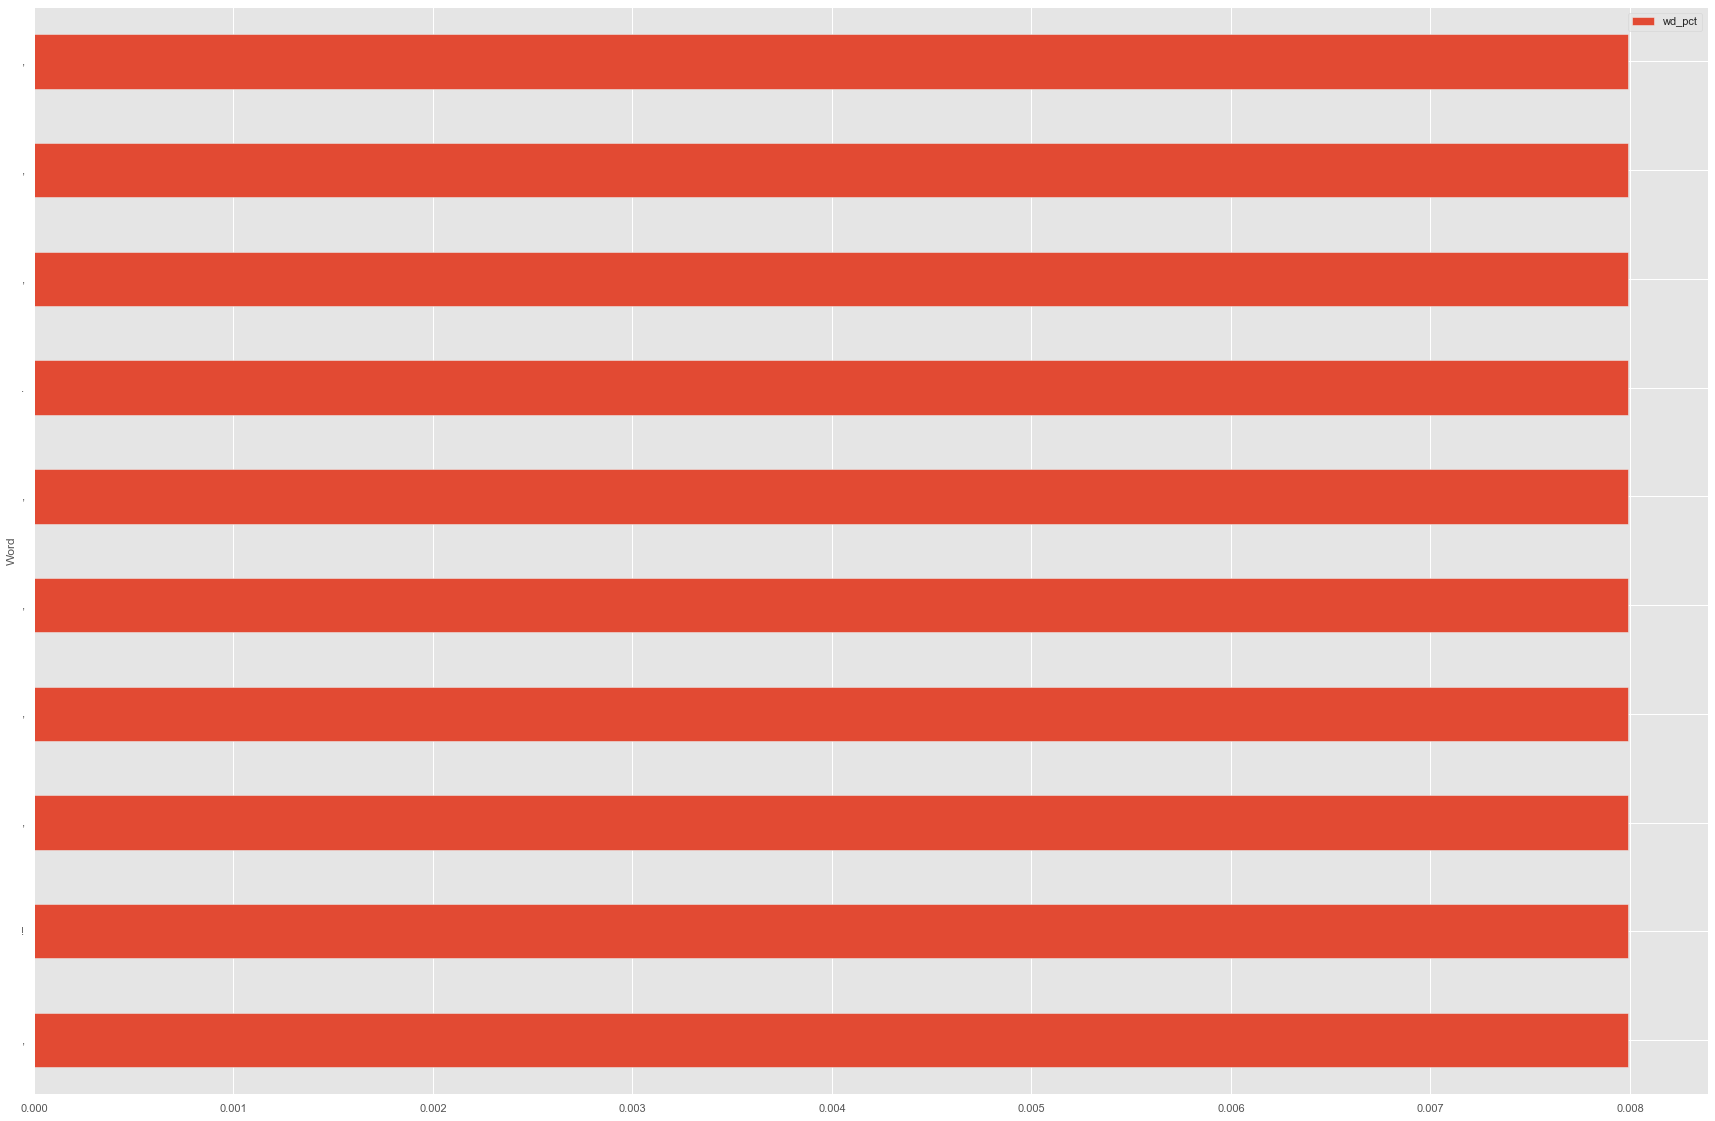

In [29]:
rep_rslt.sort_values('wd_pct',ascending=False)[20:30].plot(x='Word',y='wd_pct',kind='barh',figsize=(30,20))

All frequencies, including STOPWORDS:
              Word  Frequency
0              the       1428
1                ,       1228
2               to       1104
3                .       1093
4              and        895
5                i        706
6               of        696
7                a        672
8               in        587
9              ...        570
10             for        463
11              is        396
12              my        293
13              we        285
14             our        236
15            this        234
16               !        232
17       democrats        230
18            have        226
19              as        218
20              on        212
21            that        185
22            will        184
23             are        180
24              am        178
25              be        175
26             was        150
27            help        149
28      democratic        145
29            with        138
..             ...        ...
47

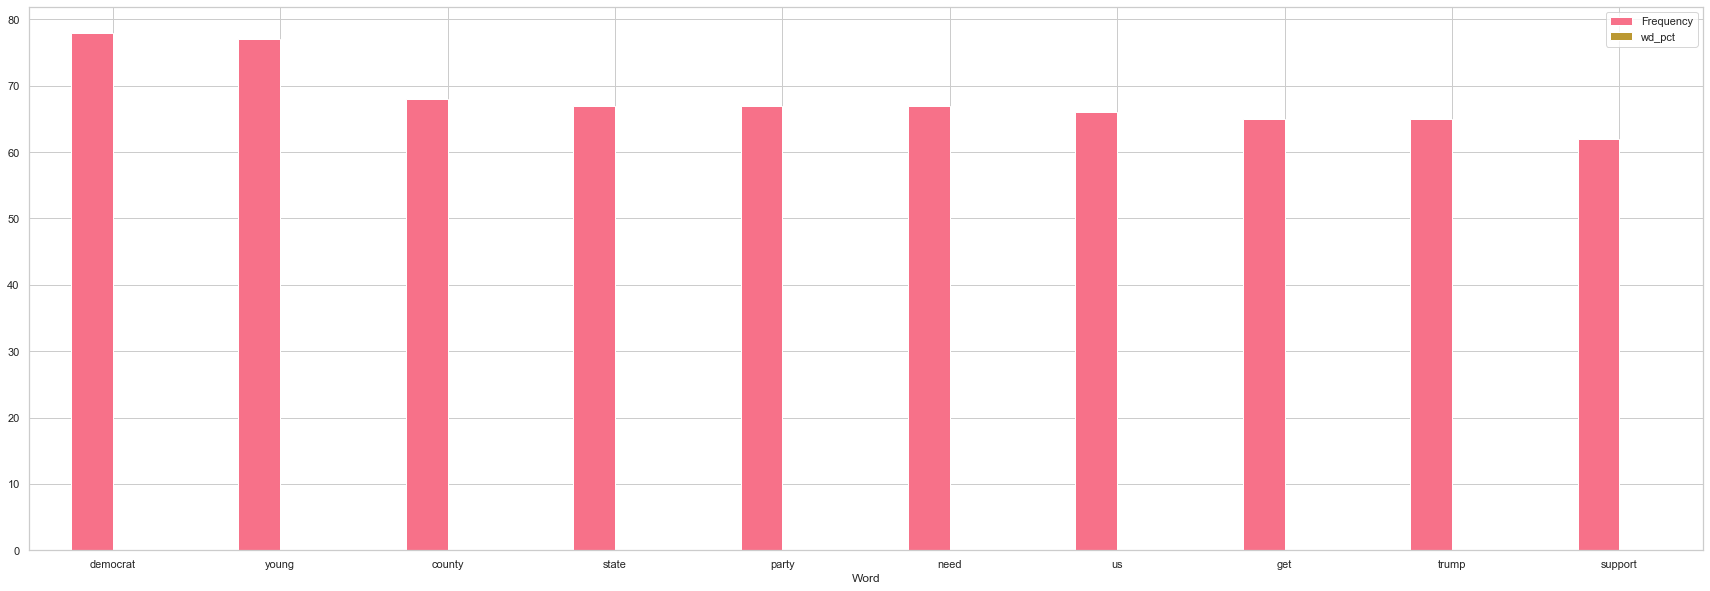

In [11]:
#campaigns with the word democrat
top_N = 500
txt = df[df['tag']=='dem']['summary'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)
dem_rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
dem_rslt['tag']='dem'
dem_rslt['wd_pct']=dem_rslt['Frequency']/1316
# matplotlib.style.use('ggplot')
dem_rslt[20:30].plot.bar(rot=0,figsize=(30,10))

In [24]:
rep_rslt.head(10)

,level_0,index,Word,Frequency,tag,wd_pct
0,0,0,smu,4,rep,0.004566
1,1,1,",",3,rep,0.003425
2,2,2,crowder,2,rep,0.002283
3,3,3,mcfarlin,2,rep,0.002283
4,4,4,.,2,rep,0.002283
5,5,5,college,1,rep,0.001142
6,6,6,republicans,1,rep,0.001142
7,7,7,bringing,1,rep,0.001142
8,8,8,comedian,1,rep,0.001142
9,9,9,steven,1,rep,0.001142


All frequencies, including STOPWORDS:
           Word  Frequency
0           the       3333
1             ,       2911
2             .       2664
3            to       2615
4           and       2085
5             a       1711
6             i       1697
7            of       1616
8            in       1399
9           ...       1374
10          for       1102
11           is        964
12           my        706
13           we        646
14         this        546
15            !        540
16           on        519
17          our        499
18         that        496
19         have        491
20           as        467
21          are        458
22           am        412
23           be        409
24         will        406
25          was        376
26         with        370
27          you        360
28           it        335
29           's        323
..          ...        ...
470           '         20
471         car         20
472       white         20
473        stop  

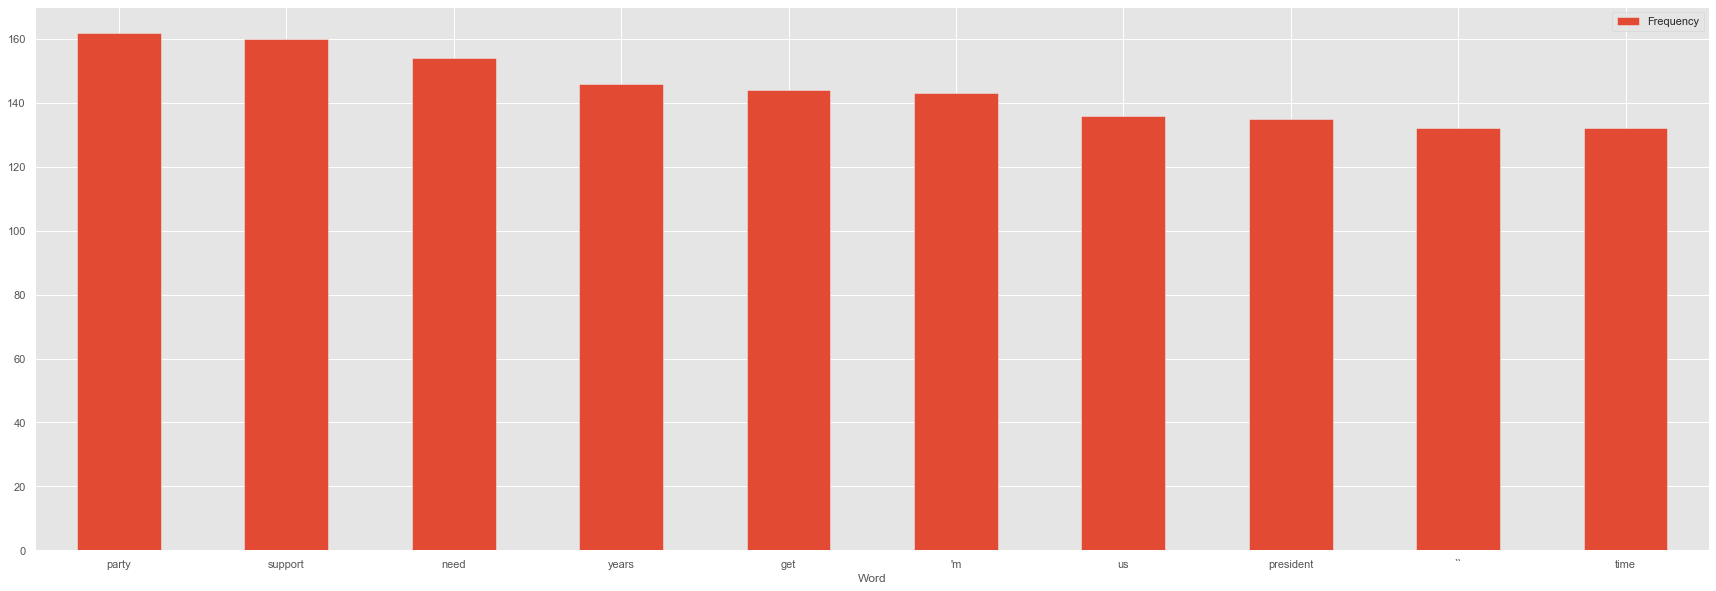

In [21]:
#all words
top_N = 500
txt = df['summary'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
rslt[20:30].plot.bar(rot=0,figsize=(30,10))

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, , to race
Data columns (total 1 columns):
Frequency    500 non-null int64
dtypes: int64(1)
memory usage: 7.8+ KB


In [20]:
words_df=rep_rslt.append(dem_rslt)
words_df=words_df.reset_index()


In [23]:
rslt=rslt.reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Word         500 non-null object
Frequency    500 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


,Word,Frequency
0,",",2911
1,.,2664
2,...,1374
3,!,540
4,'s,323
5,help,311
6,republican,275
7,democrats,275
8,’,270
9,:,255


In [27]:
ser_df=rslt
ser_df=ser_df.rename(columns={'Frequency':'total'})


In [28]:
ser_df.head(3)

,Word,total
0,",",2911
1,.,2664
2,...,1374


In [29]:
words_df=words_df.merge(ser_df,left_on='Word',right_on='Word',how='left')
words_df.head()

,Word,Frequency,tag,wd_pct,total
0,",",1683,rep,0.659741,2911.0
1,.,1571,rep,0.615837,2664.0
2,...,804,rep,0.315171,1374.0
3,!,308,rep,0.120737,540.0
4,republican,273,rep,0.107017,275.0


In [30]:
ser_df[ser_df['Word']=='republican']

,Word,total
6,republican,275


In [31]:
rslt[rslt['Word']=='republican']

,Word,Frequency
6,republican,275


In [32]:
words_df[words_df['Word']=='republican']

,Word,Frequency,tag,wd_pct,total
4,republican,273,rep,0.107017,275.0


In [33]:
ser=words_df.total

In [40]:
words_df['word_bin']=pd.qcut(ser, q=5,labels=['1','2','3','4','5'])

# sns.catplot(kind='bar',x='Frequency',y='Word',hue='tag',row='word_bin',data=words_df,height=20,aspect=2)

In [51]:
#making individual bins because 
words_df_3=words_df[words_df['word_bin']=='3']
words_df_1=words_df[words_df['word_bin']=='1']
words_df_2=words_df[words_df['word_bin']=='2']
words_df_4=words_df[words_df['word_bin']=='4']
words_df_5=words_df[words_df['word_bin']=='5']

In [42]:
words_df_3.Word.unique()

array(['nonetype', 'congress', 'start', '”', 'right', 'raised',
       'presidential', 'story', 'left', 'come', 'governor', 'club', 'ago',
       '#', 'small', 'way', 'long', 'change', 'together', 'week', 'keep',
       'used', 'good', 'group', 'care', 'education', 'city', 'show',
       'media', 'important', 'former', 'around', 'build', 'trying',
       'must', 'law', 'issues', 'fellow', 'bring', 'november', 'friend',
       'continue', 'dear', 'read', '5', 'helping', 'today', 'june',
       'future', 'past', 'voters', 'still', 'part', 'little', 'put',
       'news', 'become', 'cover', 'travel', 'funding', 'lives', 'strong',
       'member', '4', 'ca', 'voting', 'nation', 'page', 'march',
       'facebook', 'liberal', 'ever', 'lost', 'expenses', 'senator',
       'hard', 'away', 'provide', 'getting', 'world', 'send', 'cost',
       'delegates', 'hillary', 'dnc', 'progressive', 'honor', 'upcoming',
       'san'], dtype=object)

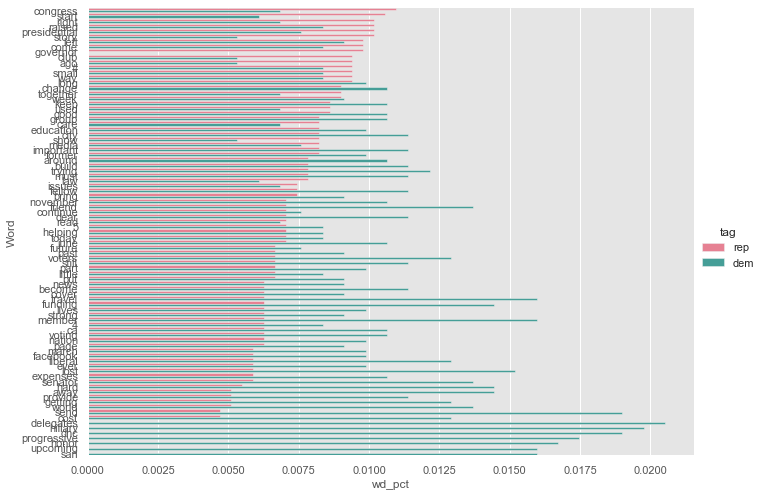

In [48]:
sns.catplot(y="Word", x="wd_pct", hue="tag", kind="bar", 
            data=words_df_3[words_df_3.Word.isin(['$', '--','-', '?',"'m",'``',"''",';','“','”','nonetype'])==False], 
            height=7, aspect=11.7/8.27,palette='husl')

In [52]:
words_df_5.Word.unique()

array([',', '.', '...', '!', 'republican', "'s", '’', ':', 'help', '(',
       ')', 'trump', 'republicans', 'people', 'money', 'support', 'state',
       'years', 'party', '``', 'name', "''", 'campaign', "'m", 'need',
       'political', 'time', 'president', 'get', 'want', 'family', 'like',
       'would', 'us', '-', '?', 'one', 'many', 'new', 'america',
       'national', 'year', 'college', 'make', 'country', 'county', '$',
       '--', 'school', 'conservative', 'american', 'states', 'democratic',
       'united', 'election', 'please', 'first', 'democrat', 'life', 'go',
       'know', 'running', 'elected', 'great', 'democrats', 'vote', "n't",
       'community', 'raise', 'hello', 'funds', 'hi', 'convention',
       'raising', 'district', 'friends', 'work', 'since', 'young', 'fund',
       'house', 'high', 'delegate', '2016', 'bernie', 'sanders'],
      dtype=object)

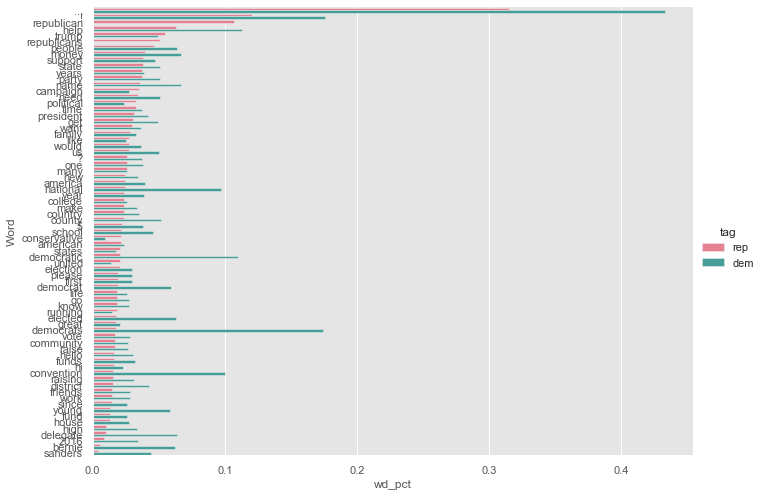

In [54]:
sns.catplot(y="Word", x="wd_pct", hue="tag", kind="bar", 
            data=words_df_5[words_df_5.Word.isin([',', '.',"'s", '’', ':','(',')',"'m","''",'``','“',"'ve",';','(',')',"n't",'--','-'])==False], 
            height=7, aspect=11.7/8.27,palette='husl')

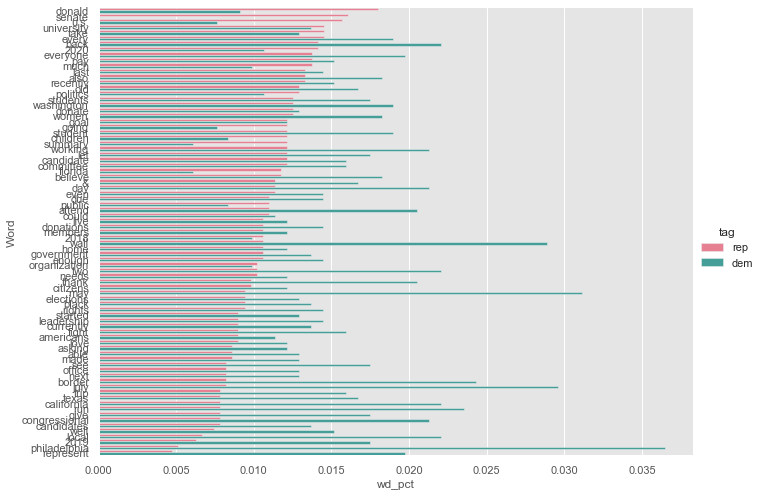

In [50]:
sns.catplot(y="Word", x="wd_pct", hue="tag", kind="bar", 
            data=words_df_4[words_df_4.Word.isin([',', '.',"'s", '’', ':','(',')',"'m","''",'``','“',"'ve",';'])==False], 
            height=7, aspect=11.7/8.27,palette='husl')

In [182]:
ser 